In [148]:
import pandas as pd, numpy as np, string, re, pytz
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from datetime import datetime as dt 
%matplotlib inline


In [149]:
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [150]:
def get_colors(cmap, n, start=0.0, stop=1.0, alpha=1.0, reverse=False):
    import matplotlib.cm as cm, numpy as np 
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [151]:
artists_most = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/sidsaxena_top_artists.csv')

In [152]:
artists_most = artists_most.set_index('artist')['play_count'].head(25)

In [153]:
artists_most.head()

artist
John Mayer         6920
Radiohead          6010
Porcupine Tree     2146
The Paper Kites    1876
Steven Wilson      1702
Name: play_count, dtype: int64

In [154]:
artists_most

artist
John Mayer               6920
Radiohead                6010
Porcupine Tree           2146
The Paper Kites          1876
Steven Wilson            1702
The Seatbelts            1473
Blackfield               1455
Tycho                    1245
Muse                     1114
Red Hot Chili Peppers    1083
The Killers              1027
The Pineapple Thief      1011
::M∆DE::IN::HEIGHTS::     987
City and Colour           842
Owl City                  823
The Midnight              710
Eden                      651
Alvvays                   644
Bryan Adams               571
The xx                    531
Oh Wonder                 479
Tomohito Nishiura         440
Brolly                    434
The Kooks                 429
Cake                      415
Name: play_count, dtype: int64

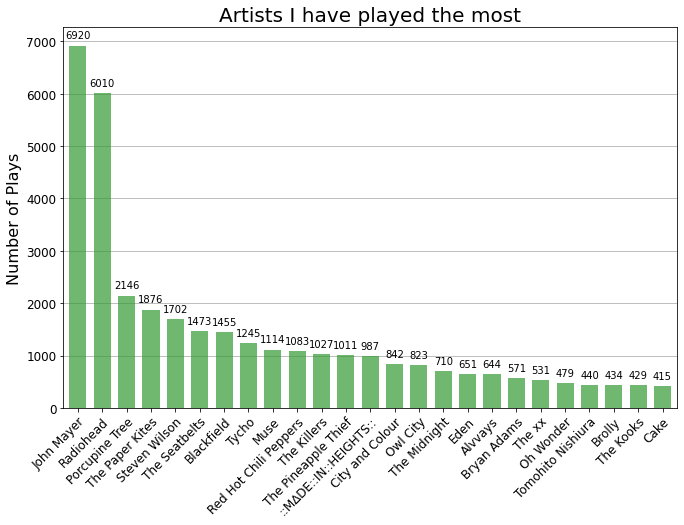

In [155]:
ax = artists_most.plot(kind = 'bar', figsize = (11,7), width=0.7, alpha=0.7, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode = 'anchor', ha='right', fontproperties=ticks_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)

ax.set_xlabel('', fontproperties = label_font)
ax.set_ylabel('Number of Plays', fontproperties=label_font)

plt.savefig('images/sidsaxena-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

In [156]:
tracks_most = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/sidsaxena_top_tracks.csv')

In [157]:
# if name too long, shorten it
def make_label(row, maxlength = 30, suffix= '...'):
    artist = row['artist']
    track = row['track']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength - len(suffix)], suffix)
    
    return '{}\n{}'.format(artist, track)

In [158]:
index = tracks_most.apply(make_label, axis='columns')

tracks_most = tracks_most.set_index(index).drop(labels=['artist', 'track'], axis='columns')

tracks_most = tracks_most['play_count'].head(20)

tracks_most.head()

The Paper Kites\nRevelator Eyes     327
Porcupine Tree\nTrains              221
The Paper Kites\nElectric Indigo    187
The Paper Kites\nBleed Confusion    172
Radiohead\nNo Surprises             164
Name: play_count, dtype: int64

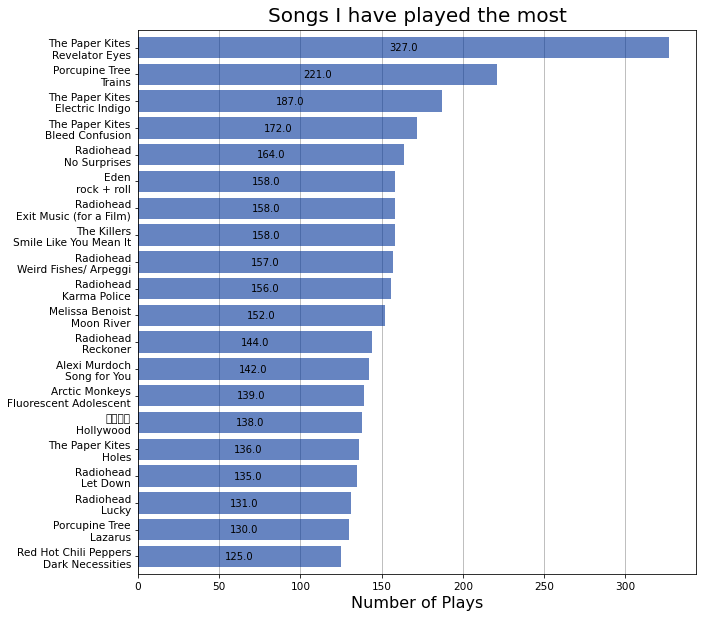

In [159]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=(10,10), width=0.8, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.xaxis.grid(True)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')

ax.set_xlabel('Number of Plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)

ax.set_title('Songs I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/sidsaxena-tracks-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

In [160]:
albums_most = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/sidsaxena_top_albums.csv')

In [161]:
def make_label(row, maxlength = 25, suffix='...'):
    artist = row['artist']
    track = row['album']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength - len(suffix)], suffix)
    return '{}\n{}'.format(artist, track)

index = albums_most.apply(make_label, axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)
albums_most.head()

The Paper Kites\nTwelvefour              1193
Radiohead\nOK Computer                    875
John Mayer\nBorn and Raised               782
John Mayer\nWhere The Light Is: Jo...     727
John Mayer\nContinuum                     719
Name: play_count, dtype: int64

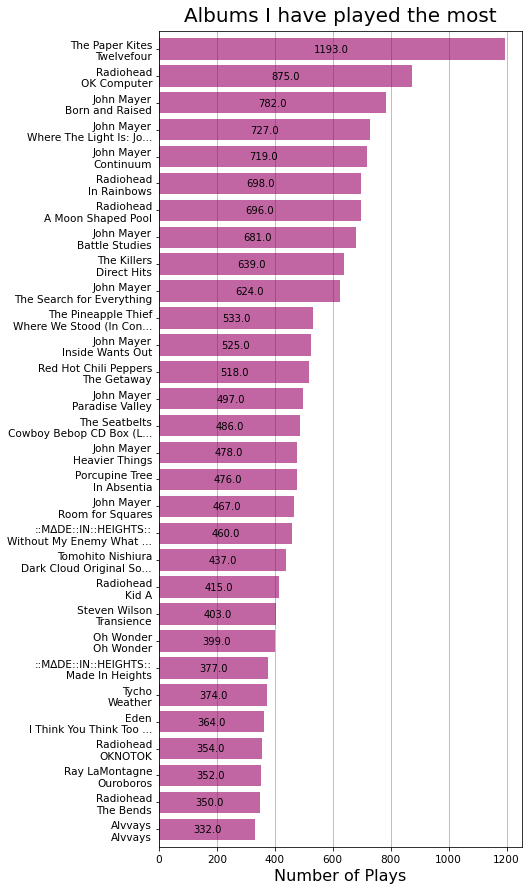

In [162]:
ax = albums_most.sort_values().plot(kind='barh', figsize=(6.5, 15), width=0.8, alpha=0.6, color='#990066', edgecolor=None, zorder=2)

ax.xaxis.grid(True)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')

ax.set_xlabel('Number of Plays', fontproperties = label_font)
ax.set_ylabel('', fontproperties=label_font)

ax.set_title('Albums I have played the most', fontproperties = title_font, y=1.005)

plt.savefig('images/sidsaxena-albums-played-most-h.png', dpi=96, bbox_inches='tight')

plt.show()

In [163]:
scrobbles = pd.read_csv('/home/sid/development/python/music-analysis/lastfm/Spreadsheets/sidsaxena-scrobbles-17082020.csv', index_col=0)

scrobbles = scrobbles.drop('timestamp', axis=1)

print('{:,} total scrobbles'.format(len(scrobbles)))
print('{:,} total artists'.format(len(scrobbles['artist'].unique())))

82,711 total scrobbles
5,421 total artists


In [164]:
scrobbles['timestamp'] = pd.to_datetime(scrobbles['datetime'])
scrobbles = scrobbles.drop('datetime', axis=1)

In [165]:
scrobbles['Year'] = scrobbles['timestamp'].apply(lambda time: time.year)
scrobbles['Month'] = scrobbles['timestamp'].apply(lambda time: time.month)
scrobbles['Day'] =  scrobbles['timestamp'].apply(lambda time: time.day)
scrobbles['Hour'] = scrobbles['timestamp'].apply(lambda time: time.hour)
scrobbles['dof'] = scrobbles['timestamp'].apply(lambda time: time.dayofweek)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

scrobbles['dof'] = scrobbles['dof'].map(dmap)

In [166]:
scrobbles

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,Year,Month,Day,Hour,dof
0,Molly Burch,74f5d2c7-48b0-4590-a54a-d444fd0b99f9,Please Be Mine,38e6a9d9-01e1-4824-9144-643e776cb0a1,Please be mine,5336c912-224c-428b-aee0-d1c9c2883806,2020-08-17 13:21:45,2020,8,17,13,Mon
1,Totally Enormous Extinct Dinosaurs,bd075a82-b196-4752-a1bb-3d87be3236a0,Don't You Forget About Me,9e7191f6-a0f2-4eba-a604-d41ef1f03baa,Don't You Forget About Me,dc4b8792-17ee-40b4-b61a-4c2e6676eb09,2020-08-17 13:16:02,2020,8,17,13,Mon
2,Mk.gee,262cf0ce-2af2-4686-a8cc-d6b33e97336d,Fool,NaN,New Year,NaN,2020-08-17 13:12:36,2020,8,17,13,Mon
3,Shook,ec9cf10d-6305-428a-97d6-3b82eec76d07,Continuum,97f70b45-a1fa-49bb-8fbb-36d52f364470,You Were Bigger Than Life,5868c840-854d-4a9d-8faf-cd243b73a749,2020-08-17 13:08:33,2020,8,17,13,Mon
4,NIGHT TRAVELER,NaN,1984,89ba2c16-dbb2-4722-8862-b29eff2724cc,1984,58024410-ef4b-4e17-9303-83d927066d99,2020-08-17 13:04:20,2020,8,17,13,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...
82706,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 06:51:20,2016,10,8,6,Sat
82707,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 06:48:06,2016,10,8,6,Sat
82708,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 06:45:48,2016,10,8,6,Sat
82709,Lauv,c0ef2ba5-a7b7-40ea-bd27-30acccfcac11,NaN,NaN,Breathe,a087c4ea-09bf-45f4-8989-15aaef1c7709,2016-10-08 06:43:52,2016,10,8,6,Sat


In [167]:
year_counts = scrobbles['Year'].value_counts().sort_index()

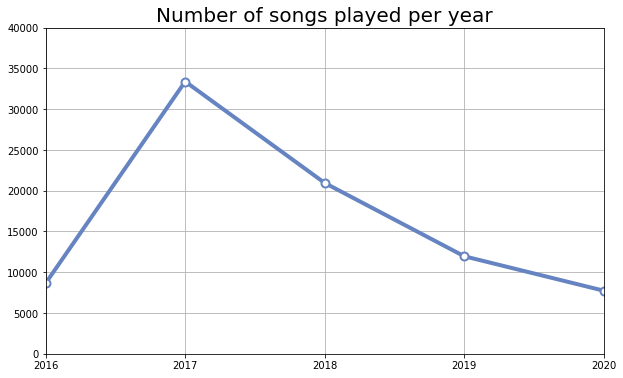

In [168]:
year_counts = scrobbles['Year'].value_counts().sort_index()
ax = year_counts.plot(kind='line', figsize=(10,6), linewidth=4, alpha=1, marker='o', color='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_ylim(0, 40000)
ax.set_xticks(year_counts.index)
ax.set_ylabel('', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)

ax.set_title('Number of songs played per year', fontproperties=title_font)

plt.savefig('images/sidsaxena-scrobbles-per-year', dpi=96, bbox_inches='tight')
plt.show()

In [169]:
min_year = min(scrobbles['Year'])
max_year = max(scrobbles['Year'])

In [170]:
month_counts = scrobbles['Month'].value_counts().sort_index()

In [171]:
date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)

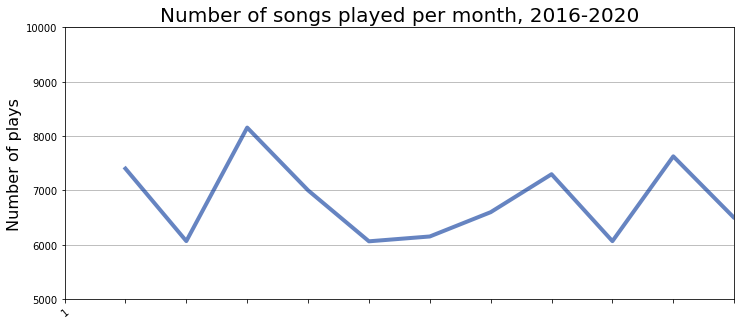

In [183]:
ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(month_counts)-1))

ax.yaxis.grid(True)
ax.set_ylim((5000,10000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

plt.savefig('images/sidsaxena-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()